In [29]:
import numpy as np
from PIL import  Image, ImageDraw, ImagePath 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image as IPython_display_Image
from IPython.display import display as IPython_display

# Making the background of the images transparent

In [2]:
# for i in range(10):
#     img = Image.open(f"..\\data\\ofir\\Pseudo-Sappho_MAN_Napoli_Inv9084\\Puzzle1\\0\\{i}.png") #
#     img = img.convert("RGBA")
#     datas = img.getdata()

#     newData = []
#     for item in datas:
#         if item[0] == 0 and item[1] == 0 and item[2] == 0:
#             newData.append((0, 0, 0, 0))
#         else:
#             newData.append(item)

#     img.putdata(newData)
#     img.save(f"..\\data\\ofir\\Pseudo-Sappho_MAN_Napoli_Inv9084\\Puzzle1\\0\\{i}_.png")


# Restoring the assembly image

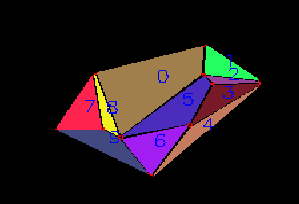

In [2]:
cpp_results_img = IPython_display_Image(filename=f"..\\data\\ofir\\Pseudo-Sappho_MAN_Napoli_Inv9084\\Puzzle1\\0\\springs_assembler.png")
display(cpp_results_img)

In [3]:
df_pieces = pd.read_csv(f"..\\data\\ofir\\Pseudo-Sappho_MAN_Napoli_Inv9084\\Puzzle1\\0\\final_transforms.csv")
df_pieces.head()

piece       t_x       t_y     r_sin     r_cos
0      0 -0.041395  0.408798 -0.915251 -0.402884
1      1  0.929249  0.799535 -0.718765  0.695253
2      2  1.012530  0.563931  0.352918 -0.935654
3      3  0.971788  0.240048 -0.995640 -0.093275
4      4  0.718689 -0.349860 -0.023732  0.999718

In [8]:
tranformations = df_pieces.values.tolist()
tranformations[:5]

[[0.0, -0.0413952, 0.408798, -0.915251, -0.402884],
 [1.0, 0.929249, 0.799535, -0.718765, 0.695253],
 [2.0, 1.01253, 0.563931, 0.352918, -0.935654],
 [3.0, 0.971788, 0.240048, -0.99564, -0.093275],
 [4.0, 0.718689, -0.34986, -0.0237322, 0.999718]]

In [39]:
def transparent_image(piece_image, translation_vector, sin_theta, cos_theta, background_image):
    # Get the size of the original image
    original_width, original_height = piece_image.size

    # Get the size of the background image
    bg_width, bg_height = background_image.size

    # Rotate the original image
    #rotated_piece_image = piece_image.rotate(-np.degrees(np.arccos(cos_theta)), resample=Image.BILINEAR, expand=True)
    rotated_piece_image = piece_image.rotate(-np.degrees(np.arccos(cos_theta)))#, resample=Image.BILINEAR, expand=True)

    # Calculate the position to paste the rotated image in the new image
    paste_position = ((bg_width - original_width) // 2 + int(translation_vector[0]),
                      (bg_height - original_height) // 2 + int(translation_vector[1]))

    # Paste the rotated image onto the background image
    #background_image.paste(rotated_piece_image, paste_position, rotated_piece_image)
    background_image.paste(rotated_piece_image, paste_position)
    # Return the resulting background image with the updated piece image
    return background_image

In [47]:
background = Image.new('RGBA', (4885, 4300), (0,0,0,0))
angle = 0 #np.pi/2 # 0

for trans in tranformations[:]:
    piece_id = int(trans[0])
    t_x = trans[1]#*1000
    t_y = trans[2]#*1000
    translation_vector = [t_x,t_y] #(int(trans[1])*1000,int(trans[2])*1000)

    sin_theta = np.sin(angle) #trans[3]#np.sin(angle) #trans[3]
    cos_theta =np.cos(angle) #trans[4]#np.cos(angle) #trans[4]

    #piece_image = Image.open(f"..\\data\\ofir\\Pseudo-Sappho_MAN_Napoli_Inv9084\\Puzzle1\\0\\{piece_id}_.png")
    piece_image = Image.open(f"..\\data\\ofir\\Pseudo-Sappho_MAN_Napoli_Inv9084\\Puzzle1\\0\\{piece_id}_.png")
    background = transparent_image(piece_image,translation_vector,sin_theta,cos_theta,background)


background.show()

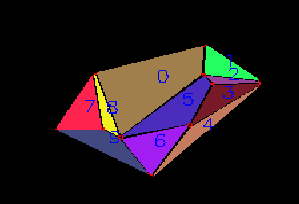

In [10]:
cpp_results_img = IPython_display_Image(filename=f"..\\data\\ofir\\Pseudo-Sappho_MAN_Napoli_Inv9084\\Puzzle1\\0\\springs_assembler.png")
display(cpp_results_img)

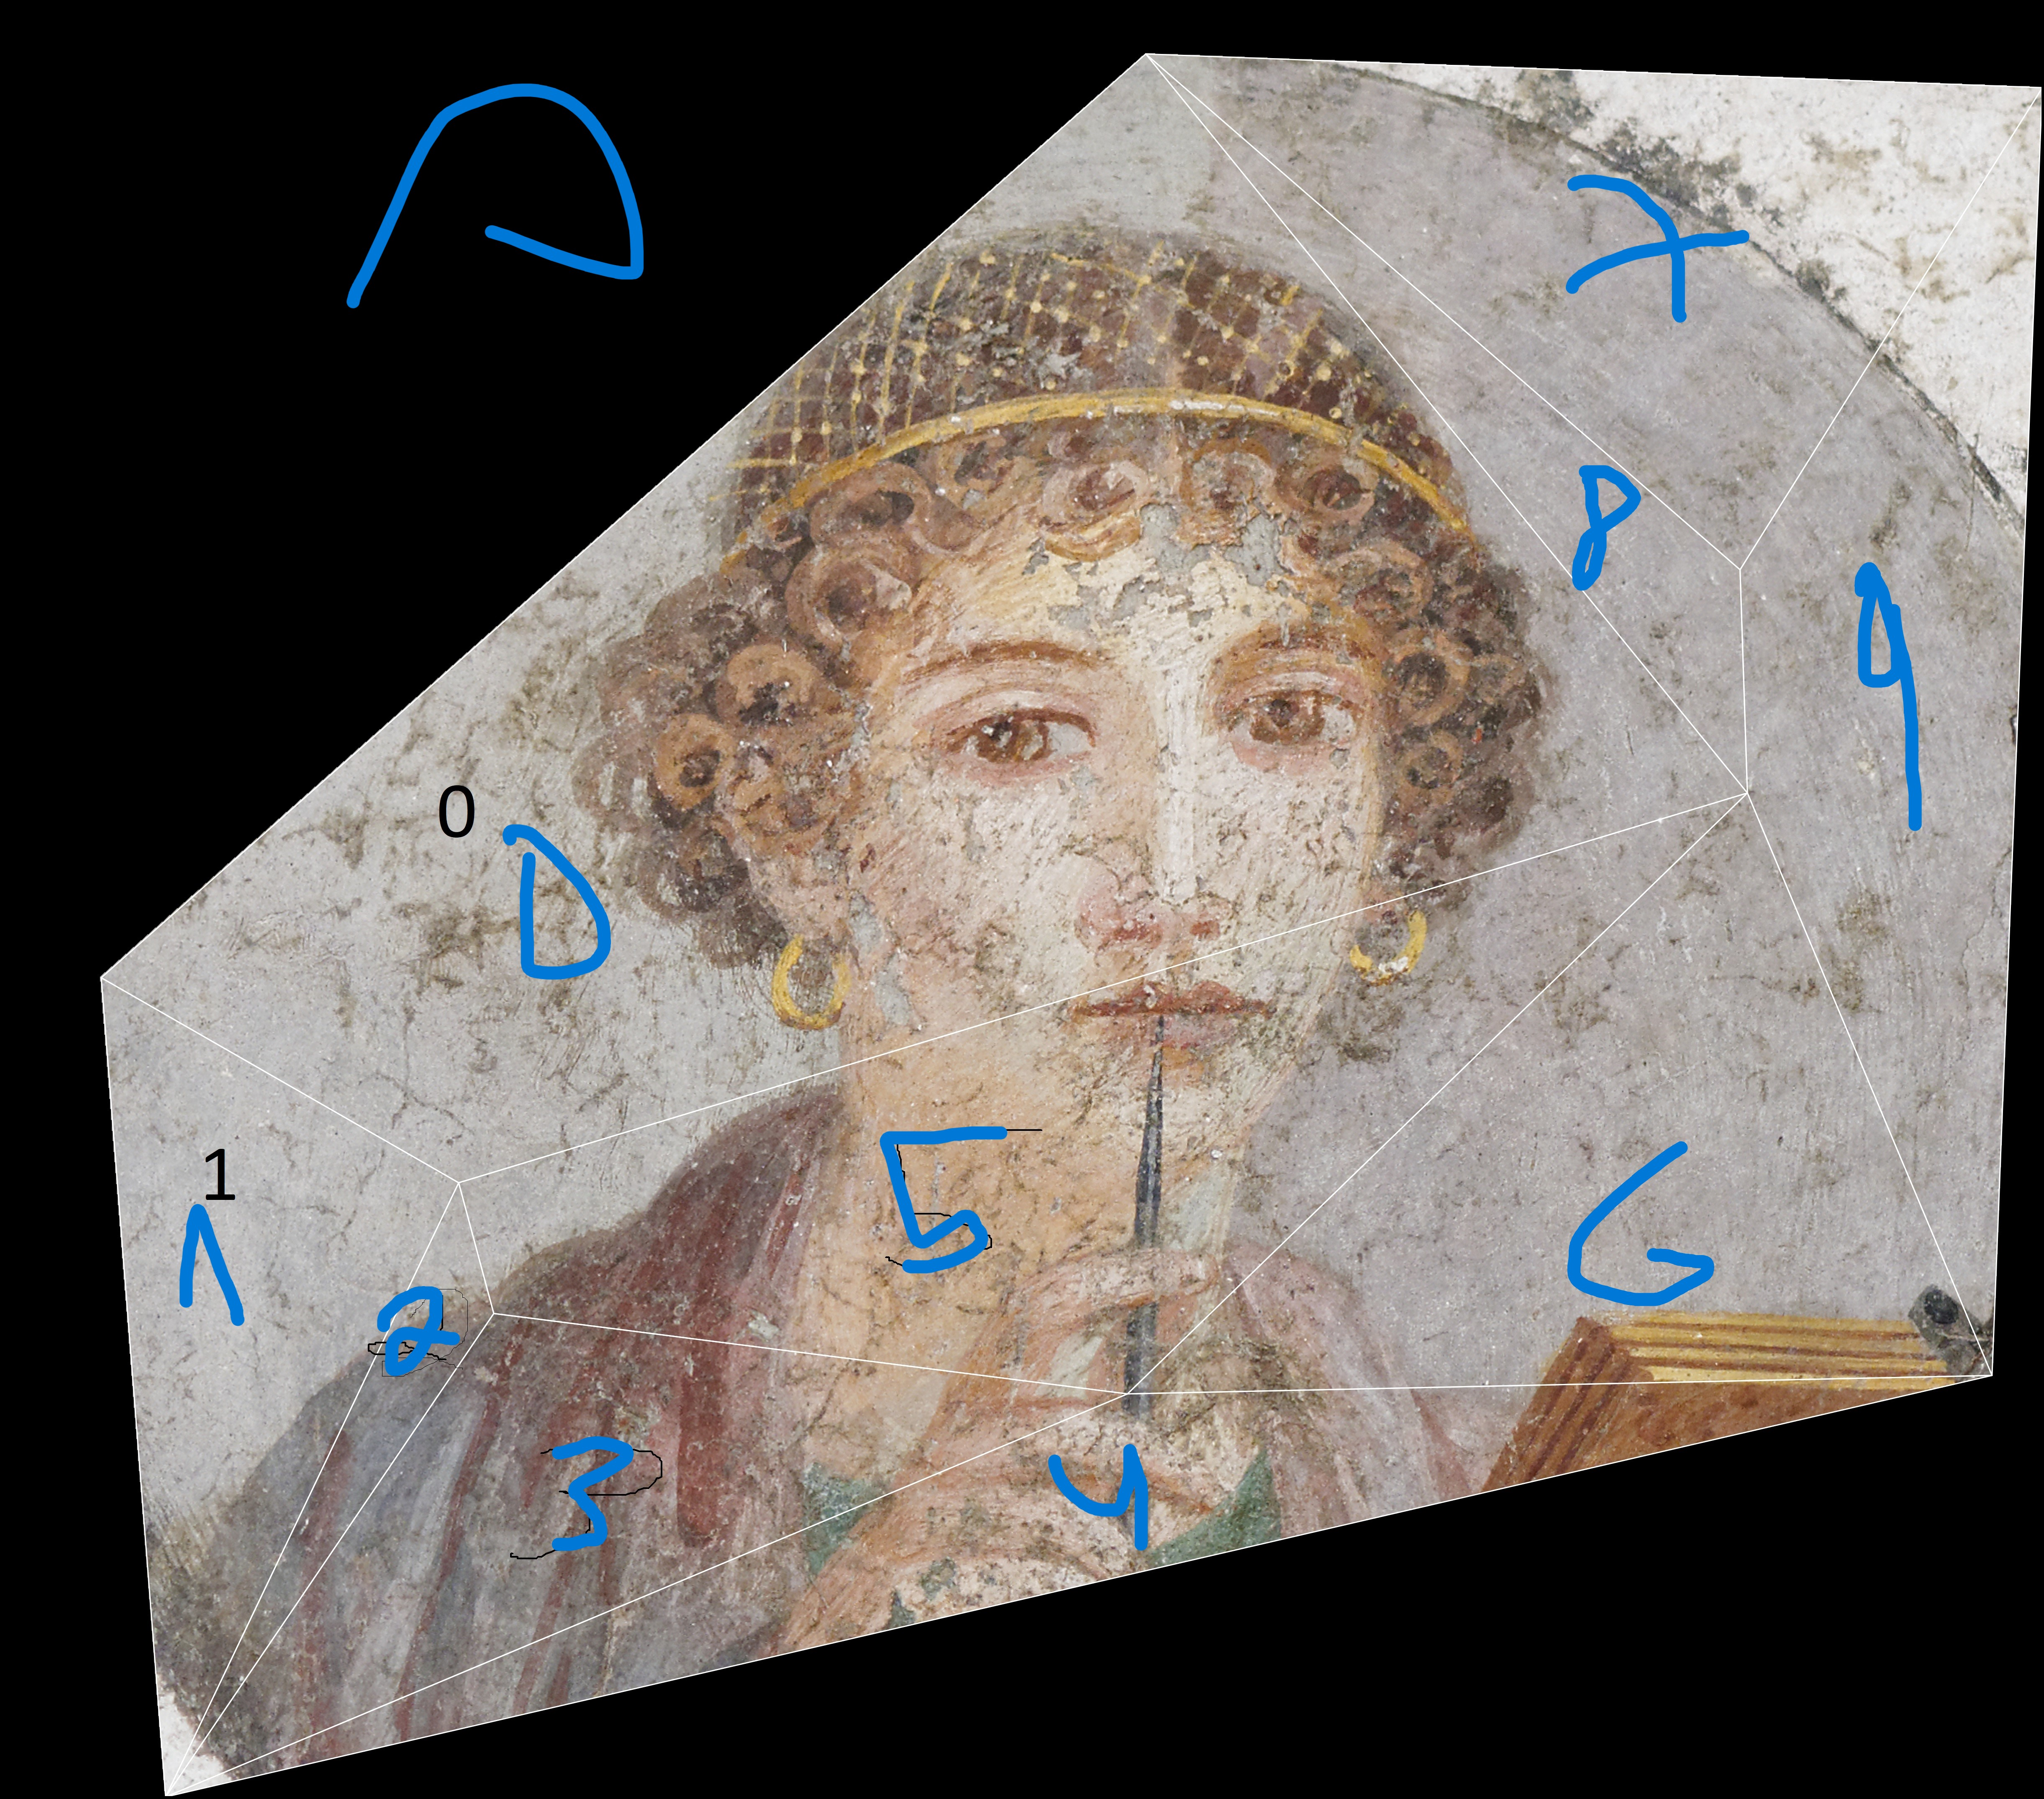

In [15]:
cpp_results_img = IPython_display_Image(filename=f"..\\data\\ofir\\Pseudo-Sappho_MAN_Napoli_Inv9084\\Puzzle1\\0\\ground_truth annotated.jpg")
display(cpp_results_img)

In [35]:



def calculate_rotation_angle(coords1, coords2):
    """Calculate the angle of rotation between two sets of polygon coordinates."""
    # Convert the polygon coordinates to numpy arrays for easier computation
    coords1 = np.array(coords1)
    coords2 = np.array(coords2)

    # Compute the centroid of each polygon
    centroid1 = np.mean(coords1, axis=0)
    centroid2 = np.mean(coords2, axis=0)

    # Translate the polygons to have their centroids at the origin
    coords1_translated = coords1 - centroid1
    coords2_translated = coords2 - centroid2

    # Compute the covariance matrix of each translated polygon
    covariance_matrix1 = np.dot(coords1_translated.T, coords2_translated)

    # Compute the singular value decomposition (SVD) of the covariance matrix
    _, _, V = np.linalg.svd(covariance_matrix1)

    # Compute the rotation matrix from the SVD results
    rotation_matrix = np.dot(V.T, V)

    # Extract the rotation angle from the rotation matrix
    rotation_angle_rad = -np.arctan2(rotation_matrix[1, 0], rotation_matrix[0, 0])

    # Convert the rotation angle from radians to degrees
    rotation_angle_deg = np.degrees(rotation_angle_rad)

    return rotation_angle_deg


# Example usage:
coords1 = [(0, 0), (0, 1), (1, 1), (1, 0)]  # List of coordinates for the original polygon
coords2 = [(0, 1), (1, 1), (1, 0), (0, 0)]  # List of coordinates for the rotated polygon

rotation_angle = calculate_rotation_angle(coords1, coords2)
print("Rotation angle:", rotation_angle, "degrees")


Rotation angle: -0.0 degrees
